## Bruit Blanc ##

Par définition, une série temporelle qui est un processus de bruit blanc présente des erreurs non corrélées en série et la moyenne attendue de ces erreurs est égale à zéro. Cela signifie que les erreurs (résidus) sont entièrement tirées au hasard d'une certaine distribution de probabilité, c'est-à-dire qu'elles sont indépendantes et distribuées de manière identique (i.i.d.).

Si notre modèle de série temporelle produit des résidus de bruit blanc, cela signifie que nous avons réussi à saisir le processus sous-jacent et à expliquer toute forme de corrélation, en ne laissant que des erreurs (résidus) qui sont complètement aléatoires. Nos valeurs prédites ne diffèrent des valeurs observées que par une composante d'erreur aléatoire qui ne peut être ni prévue ni modélisée.

La plupart des analyses de séries chronologiques tentent littéralement d'ajuster un modèle aux séries chronologiques de telle sorte que la série résiduelle ne puisse être distinguée du bruit blanc.


In [3]:
import os
import sys

import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs
import matplotlib as mpl
import matplotlib.pyplot as plt

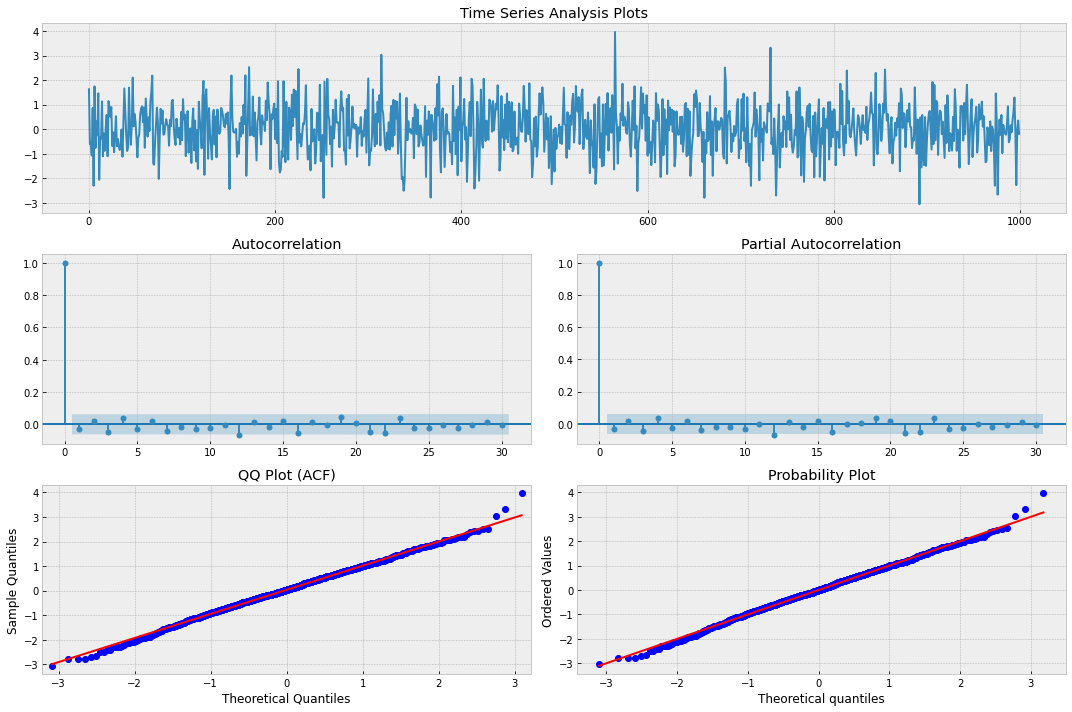

In [7]:
def tsplot(y, lags=None, figsize=(15, 10), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        fig = plt.figure(figsize=figsize)
        # mpl.rcParams['font.family'] = 'Ubuntu Mono'
        layout = (3, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        qq_ax = plt.subplot2grid(layout, (2, 0))
        pp_ax = plt.subplot2grid(layout, (2, 1))

        y.plot(ax=ts_ax)
        ts_ax.set_title('Time Series Analysis Plots')
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)
        sm.qqplot(y, line='s', ax=qq_ax)
        qq_ax.set_title('QQ Plot')
        scs.probplot(y, sparams=(y.mean(), y.std()), plot=pp_ax)

        plt.tight_layout()
    return

np.random.seed(1)

# plot of discrete white noise
randser = np.random.normal(size=1000)
tsplot(randser, lags=30)

Le premier graphe représente la série temporelle du bruit blanc.
Le deuxième graphe (deuxième ligne à gauche) représente l'ACF et le troisième (à droite) le PACF.
Le quatrième graphe (troisième ligne à gauche) représente le tracé QQ qui compare deux distributions de probabilité en traçant leurs quantiles l'un par rapport à l'autre. Si les deux distributions sont similaires (ou liées de manière linéaire), les points du tracé Q-Q se situeront approximativement sur une ligne. Pour cette discussion, nous comparons la distribution de nos résidus avec une distribution normale.
De même, la courbe de probabilité normale évalue également si un ensemble de données est ou non distribué approximativement normalement. Les données sont tracées par rapport à une distribution normale théorique de telle manière que les points doivent former une ligne droite approximative. Les écarts par rapport à cette ligne droite indiquent des écarts par rapport à la normalité.

Le processus semble être aléatoire et centré autour de zéro. Les graphiques d'autocorrélation (ACF) et d'autocorrélation partielle (PACF) n'indiquent pas non plus de corrélation sérielle significative (rappelons que nous devrions voir une signification d'environ 5 % dans les graphiques d'autocorrélation en raison du hasard pur résultant de l'échantillonnage de la distribution normale).

Ci-dessous, nous pouvons voir les graphiques de QQ et de probabilité, qui comparent la distribution de nos données avec la distribution normale standard des lignes droites.

In [8]:
print("Random Series\n -------------\nmean: %.3f \nvariance: %.3f \nstandard deviation: %.3f"
      %(randser.mean(), randser.var(), randser.std()))

Random Series
 -------------
mean: 0.039 
variance: 0.962 
standard deviation: 0.981


Il est clair que nos données sont distribuées de manière aléatoire, et semblent suivre le bruit blanc gaussien (normal), comme il se doit.